<a href="https://colab.research.google.com/github/NMThanh123/Exercies_AI/blob/main/AI_W4(Fuzzy_logic)_24_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Họ và tên: Nguyễn Minh Thành
- MSSV: 20146422
- Lớp chiều thứ 6(tiết 7-10)

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=63162b27b508591c6eebaafa941f973e3dba71a7bcff7d8d7e6818c76123e075
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

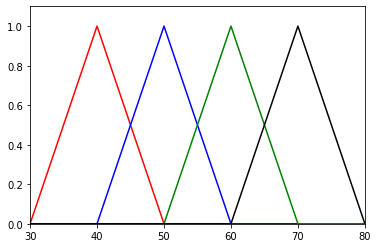

In [ ]:
arr = np.arange(30, 81, 1)
slow = fuzz.trimf(arr, [30, 40, 50])
medium = fuzz.trimf(arr, [40, 50, 60])
medium_fast = fuzz.trimf(arr, [50, 60, 70])
fall_speed = fuzz.trimf(arr, [60, 70, 80])
plt.figure()
plt.axes(xlim=(30, 80), ylim=(0, 1.1)) 
plt.plot(arr, slow, 'red', linewidth=1.5, label='Slow')
plt.plot(arr, medium, 'blue', linewidth=1.5, label='Medium')
plt.plot(arr, medium_fast, 'green', linewidth=1.5, label='Medium fast')
plt.plot(arr, fall_speed, 'black', linewidth=1.5, label='Fall speed')

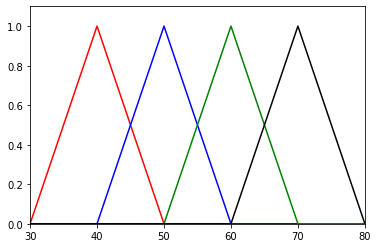

In [ ]:
arr = np.arange(30, 81, 1)
slow = fuzz.trapmf(arr, [30, 40, 40, 50])
medium = fuzz.trapmf(arr, [40, 50, 50, 60])
medium_fast = fuzz.trapmf(arr, [50, 60, 60, 70])
fall_speed = fuzz.trapmf(arr, [60, 70, 70, 80])
plt.figure()
plt.axes(xlim=(30, 80), ylim=(0, 1.1)) 
plt.plot(arr, slow, 'red', linewidth=1.5, label='Slow')
plt.plot(arr, medium, 'blue', linewidth=1.5, label='Medium')
plt.plot(arr, medium_fast, 'green', linewidth=1.5, label='Medium fast')
plt.plot(arr, fall_speed, 'black', linewidth=1.5, label='Fall speed')

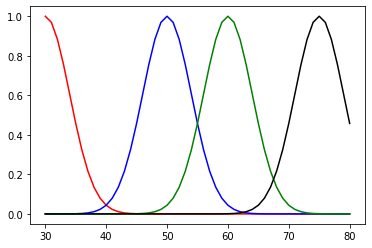

In [ ]:
arr = np.arange(30, 81, 1)
slow = fuzz.gaussmf(arr, 30, 4)
medium = fuzz.gaussmf(arr, 50, 4)
medium_fast = fuzz.gaussmf(arr, 60, 4)
fall_speed = fuzz.gaussmf(arr, 75, 4)
plt.figure()
# plt.axes(xlim=(30, 80), ylim=(0, 1.1)) 
plt.plot(arr, slow, 'red', linewidth=1.5, label='Slow')
plt.plot(arr, medium, 'blue', linewidth=1.5, label='Medium')
plt.plot(arr, medium_fast, 'green', linewidth=1.5, label='Medium fast')
plt.plot(arr, fall_speed, 'black', linewidth=1.5, label='Fall speed')

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

28.333333333333332


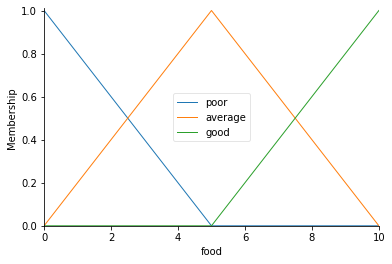

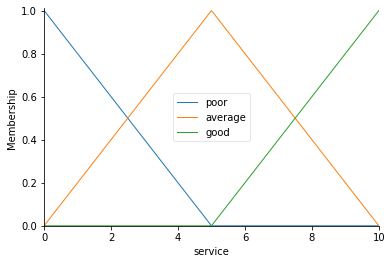

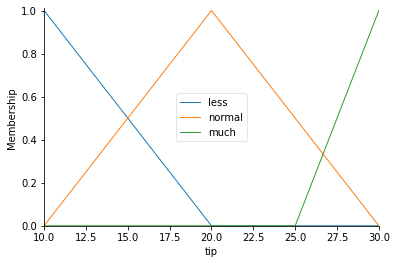

In [ ]:
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(10, 31, 1), 'tip')

food['poor'] = fuzz.trimf(food.universe, [0, 0, 5])
food['average'] = fuzz.trimf(food.universe, [0, 5, 10])
food['good'] = fuzz.trimf(food.universe, [5, 10, 10])

service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

tip['less'] = fuzz.trimf(tip.universe, [10, 10, 20])
tip['normal'] = fuzz.trimf(tip.universe, [10, 20, 30])
tip['much'] = fuzz.trimf(tip.universe, [25, 30, 30])

food.view()
service.view()
tip.view()

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['normal'])
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['normal'])
rule7 = ctrl.Rule(food['good'] & service['poor'], tip['less'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food'] = 10
tipping.input['service'] = 10
tipping.compute()

print(tipping.output['tip'])

# Power Cook rice

Power used to cook rice: 95.00000000000004 %


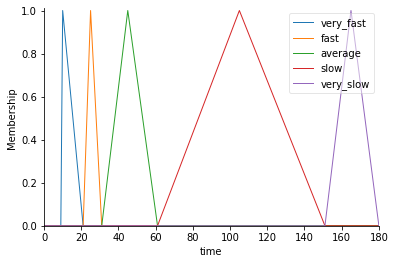

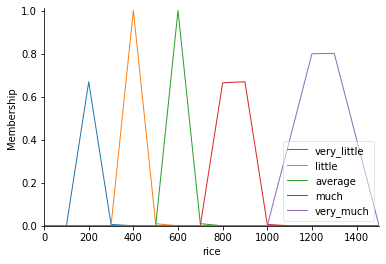

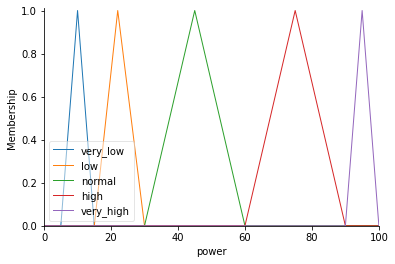

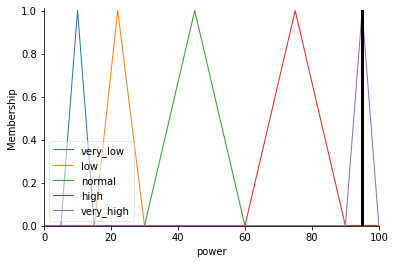

In [46]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

time = ctrl.Antecedent(np.arange(0, 181, 1), 'time')
rice = ctrl.Antecedent(np.arange(0, 1600, 100), 'rice')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')

time['very_fast'] = fuzz.trimf(time.universe, [10, 10, 21])
time['fast'] = fuzz.trimf(time.universe, [21, 25, 31])
time['average'] = fuzz.trimf(time.universe, [31, 45, 61])
time['slow'] = fuzz.trimf(time.universe, [61, 105, 151])
time['very_slow'] = fuzz.trimf(time.universe, [151, 165, 180])

rice['very_little'] = fuzz.trimf(rice.universe, [100, 150, 301])
rice['little'] = fuzz.trimf(rice.universe, [301, 400, 501])
rice['average'] = fuzz.trimf(rice.universe, [501, 600, 701])
rice['much'] = fuzz.trimf(rice.universe, [701, 850, 1001])
rice['very_much'] = fuzz.trimf(rice.universe, [1001, 1250, 1501])

power['very_low'] = fuzz.trimf(power.universe, [5, 10, 15])
power['low'] = fuzz.trimf(power.universe, [15, 22, 30])
power['normal'] = fuzz.trimf(power.universe, [30, 45, 60])
power['high'] = fuzz.trimf(power.universe, [60, 75, 90])
power['very_high'] = fuzz.trimf(power.universe, [90, 95, 100])

time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['very_fast'] & rice['very_little'], power['very_low'])
rule2 = ctrl.Rule(time['very_fast'] & rice['little'], power['low'])
rule3 = ctrl.Rule(time['very_fast'] & rice['average'], power['normal'])
rule4 = ctrl.Rule(time['very_fast'] & rice['much'], power['high'])
rule5 = ctrl.Rule(time['very_fast'] & rice['very_much'], power['very_high'])

rule6 = ctrl.Rule(time['fast'] & rice['very_little'], power['very_low'])
rule7 = ctrl.Rule(time['fast'] & rice['little'], power['low'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['normal'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule10 = ctrl.Rule(time['fast'] & rice['very_much'], power['very_high'])

rule11 = ctrl.Rule(time['average'] & rice['very_little'], power['low'])
rule12 = ctrl.Rule(time['average'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['average'] & rice['average'], power['normal'])
rule14 = ctrl.Rule(time['average'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['average'] & rice['very_much'], power['very_high'])

rule16 = ctrl.Rule(time['slow'] & rice['very_little'], power['high'])
rule17 = ctrl.Rule(time['slow'] & rice['little'], power['high'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['high'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['high'])
rule20 = ctrl.Rule(time['slow'] & rice['very_much'], power['high'])

rule21 = ctrl.Rule(time['very_slow'] & rice['very_little'], power['very_high'])
rule22 = ctrl.Rule(time['very_slow'] & rice['little'], power['high'])
rule23 = ctrl.Rule(time['very_slow'] & rice['average'], power['very_high'])
rule24 = ctrl.Rule(time['very_slow'] & rice['much'], power['very_high'])
rule25 = ctrl.Rule(time['very_slow'] & rice['very_much'], power['very_high'])


power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12,rule13, 
                                 rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
powering = ctrl.ControlSystemSimulation(power_ctrl)

powering.input['time'] = 30
powering.input['rice'] = 1500
powering.compute()

print('Power used to cook rice: {} %'.format(powering.output['power']))

power.view(sim=powering)

# 2.3 Case tudy 1

## 2.3.1 ProtFIS

- For the glycaemia input variable, the following threshold values are
used (reference values used by physicians): normal for values between
70 and 99 mg/dL; impaired for values between 100 and 125 mg/dL;
and diabetes for values greater than 126 mg/dL. Starting from these
data, three fuzzy sets are named in order good, alarm, and danger.
- For blood level of the Sirolimus (Rapamune) input variable, the fuzzy
sets are identified on the information provided by European Medicines
Agency,50 according to this agency, and with the medical support, this
range is split in alarm down (0‐5 ng/mL), sufficient (4‐7 ng/mL), good
(6‐12 ng/mL), alarm up (11‐14 ng/mL), and danger (13‐20 ng/mL).
- For the proteinuria output variable, the following threshold values
are used (reference values used by physicians): physiological proteinuria (150 mg/24 h); light proteinuria (150‐500 mg/24 h); moderate
proteinuria (500‐1000 mg/24 h); severe proteinuria (1000‐3000
mg/24 h); and nephrotic proteinuria (>3000 mg/24 h). The five trapezoidal and triangular membership functions coupled with these values
are in order: good, sufficient, alterate, alarm, and danger.
- A central point in FIS implementation consists in determining the
inference rules. These are defined based on a set trial and of the clinical opinion that is fundamental in defining the basis of system knowledge. The same weight has been associated with all the rules, ie, 1.
- The inference rules used in the system are shown in Table 1

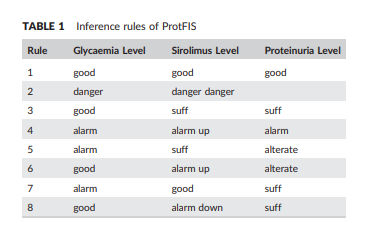

In [47]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

The proteinuria output: 325.4083333333323 mg/24h --> sufficient


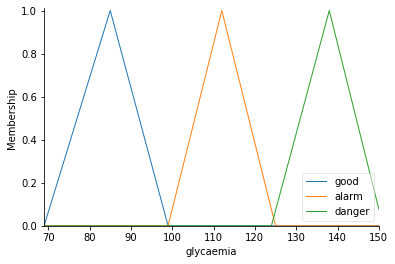

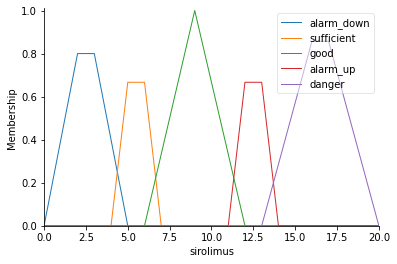

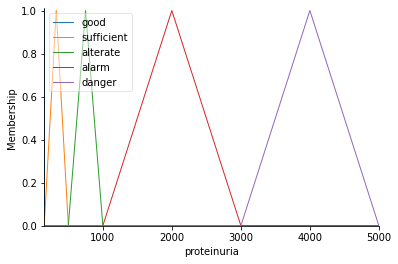

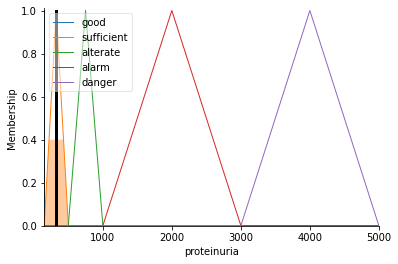

In [48]:
glycaemia = ctrl.Antecedent(np.arange(69, 151, 1), 'glycaemia')
sirolimus = ctrl.Antecedent(np.arange(0, 21, 1), 'sirolimus')
proteinuria = ctrl.Consequent(np.arange(149, 5001, 1), 'proteinuria')

glycaemia['good'] = fuzz.trimf(glycaemia.universe, [69, 85, 99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [99, 112, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [124, 138, 151])

sirolimus['alarm_down'] = fuzz.trimf(sirolimus.universe, [0, 2.5, 5])
sirolimus['sufficient'] = fuzz.trimf(sirolimus.universe, [4, 5.5, 7])
sirolimus['good'] = fuzz.trimf(sirolimus.universe, [6, 9, 12])
sirolimus['alarm_up'] = fuzz.trimf(sirolimus.universe, [11, 12.5, 14])
sirolimus['danger'] = fuzz.trimf(sirolimus.universe, [13, 16.5, 20])

proteinuria['good'] = fuzz.trimf(proteinuria.universe, [150, 150, 150])
proteinuria['sufficient'] = fuzz.trimf(proteinuria.universe, [151, 325, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe, [500, 750, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe, [1000, 2000, 3000])
proteinuria['danger'] = fuzz.trimf(proteinuria.universe, [3000, 4000, 5000])

dir_protein = {'good': [150, 151], 'sufficient': [151, 500], 'alterate': [500, 1000], 'alarm': [1001, 3000], 'danger':[3000, 5000]}

rule1 = ctrl.Rule(glycaemia['good'] & sirolimus['good'], proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger'] & sirolimus['danger'], proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good'] & sirolimus['sufficient'], proteinuria['sufficient'])
rule4 = ctrl.Rule(glycaemia['alarm'] & sirolimus['alarm_up'], proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & sirolimus['sufficient'], proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm_up'], proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm'] & sirolimus['good'], proteinuria['sufficient'])
rule8 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm_down'], proteinuria['sufficient'])
rule9 = ctrl.Rule(glycaemia['danger'] & sirolimus['sufficient'], proteinuria['alarm'])
rule10 = ctrl.Rule(glycaemia['danger'] & sirolimus['good'], proteinuria['alarm'])
rule11 = ctrl.Rule(glycaemia['danger'] & sirolimus['alarm_up'], proteinuria['danger'])

glycaemia.view()
sirolimus.view()
proteinuria.view()

proteinuria_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11])
protein = ctrl.ControlSystemSimulation( proteinuria_ctrl)

protein.input['glycaemia'] = 113
protein.input['sirolimus'] = 7.2
protein.compute()
result = protein.output['proteinuria']

for i, value in enumerate(dir_protein):
    if dir_protein[value][0] <= result < dir_protein[value][1]:
        break
    else:
        continue

print('The proteinuria output: {} mg/24h --> {}'.format(protein.output['proteinuria'], value))

proteinuria.view(sim=protein)

## 2.3.2 GfrFIS

- For glycaemia input variable, the same membership functions of
ProtFIS are used.
- For dosage of calcineurin inhibitor (cyclosporine) input variable, the
reference drug is Neoral; also in this case, fuzzy sets are identified on
the information provided by European Medicines Agency,51
implementing five fuzzy sets to better characterize the physio‐
pathological behaviour of patients, highlighting the risk related to
the high dosage: alarm down (0‐2 mg/kg), good (1.5‐5 mg/kg), suff
(4‐11 mg/kg), alarm up (8‐15 mg/kg) and danger (12‐20 mg/kg).
- GFR output is made by MDRD equation52 using creatinine serum.
Usual threshold values (reference values used by physicians) are stage
1: GFR ≥ 90 mL/min; stage 2: 60 ≤ GFR < 90; stage 3: 30 ≤ GFR <
60; stage 4: 15 < GFR < 30; stage 5: GFR < 15 with five fuzzy set
named in order: danger, alarm 4, alarm 3, alarm 2, and good.
- The inference rules (with same weight unitary) are shown in Table 2:

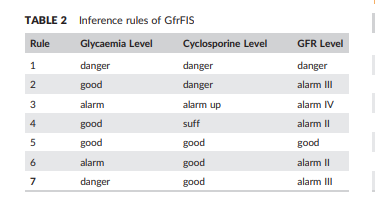

The GFR level: 7.500000000000002 mL/min --> good


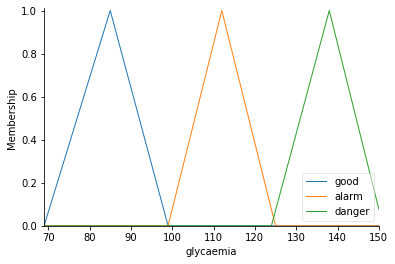

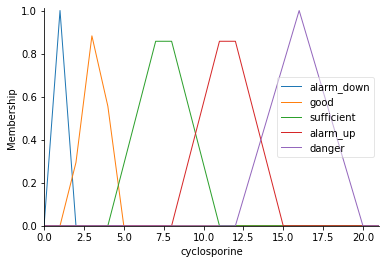

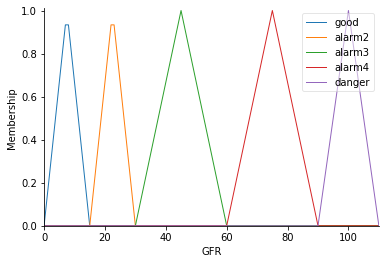

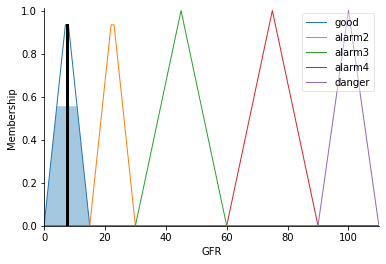

In [49]:
from networkx.algorithms.clique import graph_number_of_cliques
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

glycaemia = ctrl.Antecedent(np.arange(69, 151, 1), 'glycaemia')
cyclosporine = ctrl.Antecedent(np.arange(0, 22, 1), 'cyclosporine')
GFR = ctrl.Consequent(np.arange(0, 111, 1), 'GFR')

glycaemia['good'] = fuzz.trimf(glycaemia.universe, [69, 85, 99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [99, 112, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [124, 138, 151])

cyclosporine['alarm_down'] = fuzz.trimf(cyclosporine.universe, [0, 1, 2])
cyclosporine['good'] = fuzz.trimf(cyclosporine.universe, [1.5, 3.2, 5])
cyclosporine['sufficient'] = fuzz.trimf(cyclosporine.universe, [4, 7.5, 11])
cyclosporine['alarm_up'] = fuzz.trimf(cyclosporine.universe, [8, 11.5, 15])
cyclosporine['danger'] = fuzz.trimf(cyclosporine.universe, [12, 16, 20])

GFR['good'] = fuzz.trimf(GFR.universe, [0, 7.5, 15])
GFR['alarm2'] = fuzz.trimf(GFR.universe, [15, 22.5, 30])
GFR['alarm3'] = fuzz.trimf(GFR.universe, [30, 45, 60])
GFR['alarm4'] = fuzz.trimf(GFR.universe, [60, 75, 90])
GFR['danger'] = fuzz.trimf(GFR.universe, [90, 100, 110])
dir_GFR = {'good': [0, 15], 'alarm2': [16, 30], 'alarm3': [30, 60], 'alarm4': [60, 90], 'danger':[90, 110]}

rule1 = ctrl.Rule(glycaemia['danger'] & cyclosporine['danger'], GFR['danger'])
rule2 = ctrl.Rule(glycaemia['good'] & cyclosporine['danger'], GFR['alarm3'])
rule3 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['alarm_up'], GFR['alarm4'])
rule4 = ctrl.Rule(glycaemia['good'] & cyclosporine['sufficient'], GFR['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & cyclosporine['good'], GFR['good'])
rule6 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['good'], GFR['alarm2'])
rule7 = ctrl.Rule(glycaemia['danger'] & cyclosporine['good'], GFR['alarm3'])
rule8 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['danger'], GFR['alarm4'])

glycaemia.view()
cyclosporine.view()
GFR.view()

gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
gfr = ctrl.ControlSystemSimulation(gfr_ctrl)

gfr.input['glycaemia'] = 83
gfr.input['cyclosporine'] = 4
gfr.compute()
result = gfr.output['GFR']

for i, value in enumerate(dir_GFR):
    if dir_GFR[value][0] <= result < dir_GFR[value][1]:
        break
    else:
        continue

print('The GFR level: {} mL/min --> {}'.format(result, value))

GFR.view(sim=gfr)

# 2.4 Case study 2

##  2.4.1 ProtACE

- The variation of proteinuria is evaluated by loading in input two
parameters: glycaemia and the decreasing of the dosage of the ACE‐
Inhibitor drug.
- For glycaemia input variable, for proteinuria and Gfr output variables, the same membership functions of case study 1 are used.
- For ACE‐inhibitor (Ramipril), the reference drug is Triatec, (recommended dose by European Medicines Agency53: 1.25 mg/d, 2.5
mg/d, 5 mg/d, up to a maximum of 10 mg/d). The differences of
ACE‐inhibitor dosage in therapy are split in five fuzzy sets by
increasingly higher differences according to the following levels: 0
(no difference), 1, 2, 3, and 4 (maximum possible variation).
- The inference rules used in the GfrACE system are shown in
Table 3:

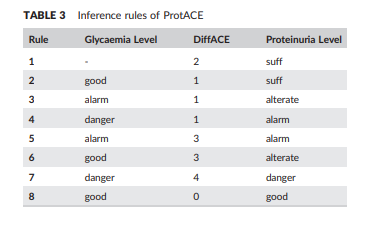

The proteinuria output: 1999.999999999943 mg/24h --> alarm


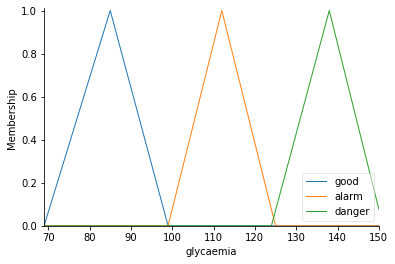

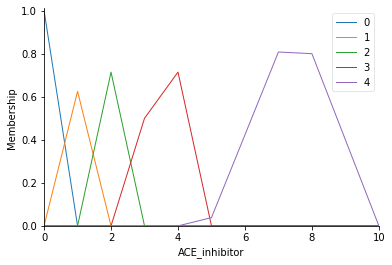

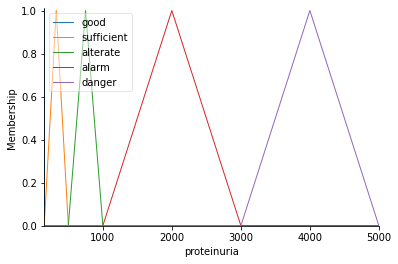

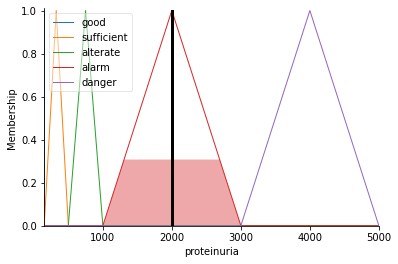

In [50]:
from networkx.algorithms.clique import graph_number_of_cliques
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

glycaemia = ctrl.Antecedent(np.arange(69, 151, 1), 'glycaemia')
ACE_inhibitor = ctrl.Antecedent(np.arange(0, 11, 1), 'ACE_inhibitor')
proteinuria = ctrl.Consequent(np.arange(149, 5001, 1), 'proteinuria')

glycaemia['good'] = fuzz.trimf(glycaemia.universe, [69, 85, 99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [99, 112, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [124, 138, 151])

ACE_inhibitor['0'] = fuzz.trimf(ACE_inhibitor.universe, [0, 0, 0.5])
ACE_inhibitor['1'] = fuzz.trimf(ACE_inhibitor.universe, [0.4, 0.85, 1.25])
ACE_inhibitor['2'] = fuzz.trimf(ACE_inhibitor.universe, [1.2, 1.8, 2.5])
ACE_inhibitor['3'] = fuzz.trimf(ACE_inhibitor.universe, [2.4, 3.6, 5])
ACE_inhibitor['4'] = fuzz.trimf(ACE_inhibitor.universe, [4.9, 7.5, 10])

proteinuria['good'] = fuzz.trimf(proteinuria.universe, [150, 150, 150])
proteinuria['sufficient'] = fuzz.trimf(proteinuria.universe, [151, 325, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe, [500, 750, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe, [1000, 2000, 3000])
proteinuria['danger'] = fuzz.trimf(proteinuria.universe, [3000, 4000, 5000])

dir_protein = {'good': [150, 151], 'sufficient': [151, 500], 'alterate': [500, 1000], 'alarm': [1001, 3000], 'danger':[3000, 5000]}

rule1 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['2'], proteinuria['sufficient'])
rule2 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['1'], proteinuria['sufficient'])
rule3 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['1'], proteinuria['alterate'])
rule4 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['1'], proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['3'], proteinuria['alarm'])
rule6 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['3'], proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['4'], proteinuria['danger'])
rule8 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['0'], proteinuria['good'])
rule9 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['4'], proteinuria['danger'])

glycaemia.view()
ACE_inhibitor.view()
proteinuria.view()

proteinuria_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
protein = ctrl.ControlSystemSimulation( proteinuria_ctrl)

protein.input['glycaemia'] = 121
protein.input['ACE_inhibitor'] = 3.12
protein.compute()
result = protein.output['proteinuria']

for i, value in enumerate(dir_protein):
    if dir_protein[value][0] <= result < dir_protein[value][1]:
        break
    else:
        continue

print('The proteinuria output: {} mg/24h --> {}'.format(protein.output['proteinuria'], value))

proteinuria.view(sim=protein)

## 2.4.2 GfrACE

- The variation of GFR is evaluated by loading two‐parameter input,
glycaemia, and the increase in the dose of the ACE‐inhibitor drug.
- The inference rules used in the GfrACE system are shown in
Table 4:

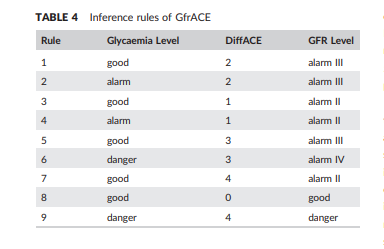

The GFR level: 45.0 mL/min --> alarm3


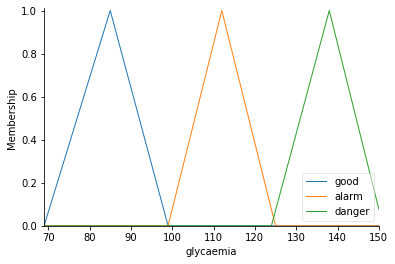

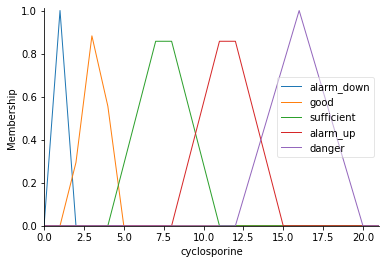

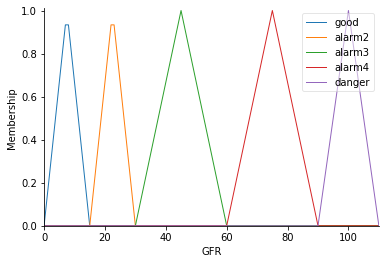

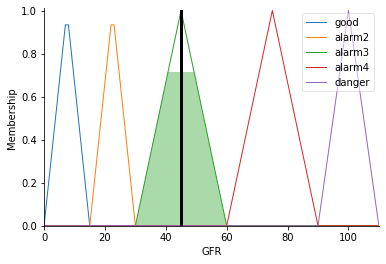

In [51]:
from networkx.algorithms.clique import graph_number_of_cliques
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

glycaemia = ctrl.Antecedent(np.arange(69, 151, 1), 'glycaemia')
ACE_inhibitor = ctrl.Antecedent(np.arange(0, 11, 1), 'ACE_inhibitor')
GFR = ctrl.Consequent(np.arange(0, 111, 1), 'GFR')

glycaemia['good'] = fuzz.trimf(glycaemia.universe, [69, 85, 99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [99, 112, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [124, 138, 151])

ACE_inhibitor['0'] = fuzz.trimf(ACE_inhibitor.universe, [0, 0, 0.5])
ACE_inhibitor['1'] = fuzz.trimf(ACE_inhibitor.universe, [0.4, 0.85, 1.25])
ACE_inhibitor['2'] = fuzz.trimf(ACE_inhibitor.universe, [1.2, 1.8, 2.5])
ACE_inhibitor['3'] = fuzz.trimf(ACE_inhibitor.universe, [2.4, 3.6, 5])
ACE_inhibitor['4'] = fuzz.trimf(ACE_inhibitor.universe, [4.9, 7.5, 10])

GFR['good'] = fuzz.trimf(GFR.universe, [0, 7.5, 15])
GFR['alarm2'] = fuzz.trimf(GFR.universe, [15, 22.5, 30])
GFR['alarm3'] = fuzz.trimf(GFR.universe, [30, 45, 60])
GFR['alarm4'] = fuzz.trimf(GFR.universe, [60, 75, 90])
GFR['danger'] = fuzz.trimf(GFR.universe, [90, 100, 110])
dir_GFR = {'good': [0, 15], 'alarm2': [16, 30], 'alarm3': [30, 60], 'alarm4': [60, 90], 'danger':[90, 110]}

rule1 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['2'], GFR['alarm3'])
rule2 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['2'], GFR['alarm3'])
rule3 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['1'], GFR['alarm2'])
rule4 = ctrl.Rule(glycaemia['alarm'] & ACE_inhibitor['1'], GFR['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['3'], GFR['alarm3'])
rule6 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['3'], GFR['alarm4'])
rule7 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['4'], GFR['alarm2'])
rule8 = ctrl.Rule(glycaemia['good'] & ACE_inhibitor['0'], GFR['good'])
rule9 = ctrl.Rule(glycaemia['danger'] & ACE_inhibitor['4'], GFR['danger'])

glycaemia.view()
ACE_inhibitor.view()
GFR.view()

gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
gfr = ctrl.ControlSystemSimulation(gfr_ctrl)

gfr.input['glycaemia'] = 83
gfr.input['ACE_inhibitor'] = 4
gfr.compute()
result = gfr.output['GFR']

for i, value in enumerate(dir_GFR):
    if dir_GFR[value][0] <= result < dir_GFR[value][1]:
        break
    else:
        continue

print('The GFR level: {} mL/min --> {}'.format(result, value))

GFR.view(sim=gfr)